In [1]:
!pip install -U efficientnet

     |████████████████████████████████| 50 kB 294 kB/s eta 0:00:011
     |████████████████████████████████| 30.3 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 113 kB 5.0 MB/s eta 0:00:01


In [3]:
!pip install tensorflow keras

     |████████████████████████████████| 120.8 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 448 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 608 kB/s  eta 0:00:01
     |████████████████████████████████| 2.5 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.7 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.6 MB/s  eta 0:00:01
Processing /Users/ravimashru/Library/Caches/pip/wheels/e4/76/4d/a95b8dd7b452b69e8ed4f68b69e1b55e12c9c9624dd962b191/PyYAML-5.3-cp37-cp37m-macosx_10_14_x86_64.whl
     |████████████████████████████████| 76 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 58 kB 4.2 MB/s  eta 0:00:01
     |█████████████

In [4]:
import efficientnet.keras as efn 

Using TensorFlow backend.


In [26]:
model = efn.EfficientNetB7(weights='noisy-student')

In [6]:
model.summary()

Model: "efficientnet-b7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 600, 600, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 300, 300, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 300, 300, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 300, 300, 64) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [7]:
from keras.applications.imagenet_utils import decode_predictions
from efficientnet.keras import EfficientNetB0
from efficientnet.keras import center_crop_and_resize, preprocess_input

In [8]:
from IPython import display

In [24]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

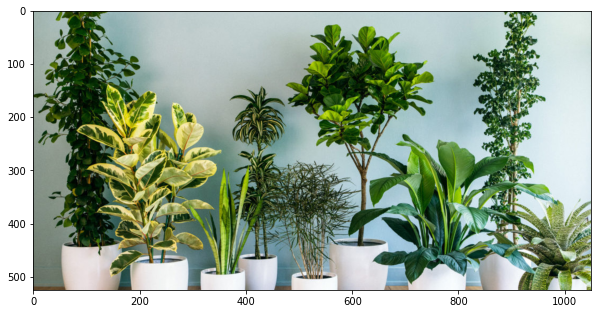

In [21]:
img_path = './test/plant1.jpg'
image = imread(img_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [19]:
def show_img(path):
    display.display(display.Image(path))

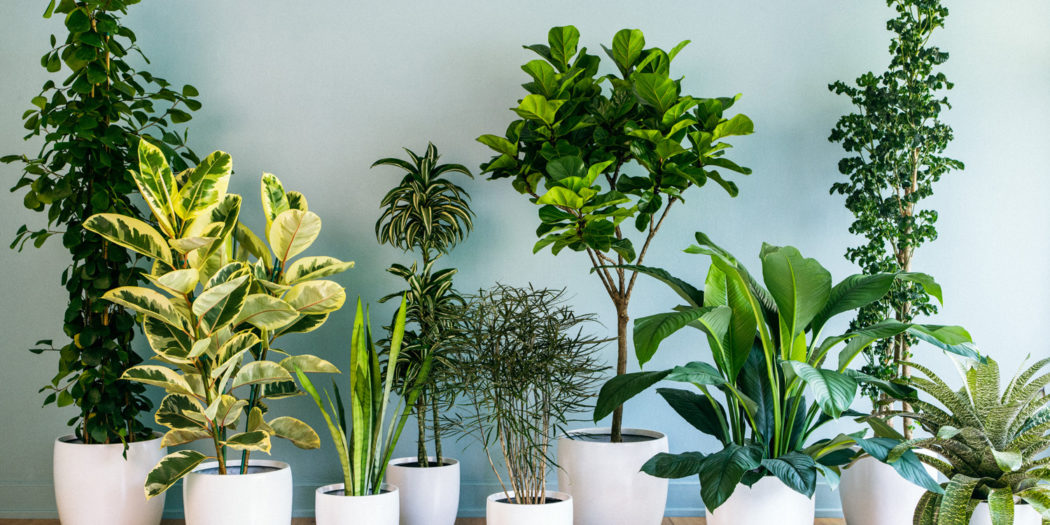

In [22]:
show_img(img_path)

In [25]:
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

40960/35363 [==================================] - 0s 1us/step


[[('n03991062', 'pot', 0.85512424),
  ('n04522168', 'vase', 0.004616499),
  ('n04118776', 'rule', 0.00060994737),
  ('n03786901', 'mortar', 0.0005979863),
  ('n01914609', 'sea_anemone', 0.000597899)]]

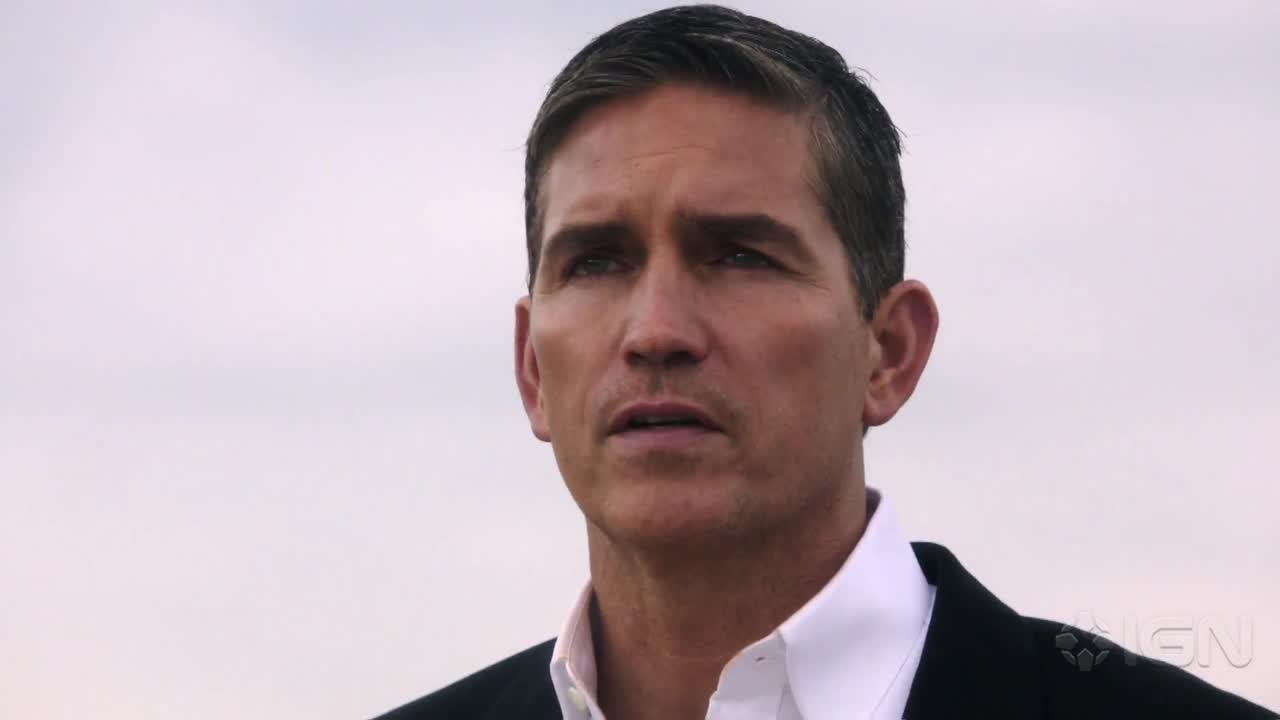

In [28]:
img_path2 = './test/person1.jpg'
image2 = imread(img_path2)
show_img(img_path2)

In [29]:
image_size = model.input_shape[1]
x = center_crop_and_resize(image2, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

[[('n04350905', 'suit', 0.39341855),
  ('n04591157', 'Windsor_tie', 0.10546167),
  ('n02883205', 'bow_tie', 0.053081274),
  ('n03759954', 'microphone', 0.026468005),
  ('n03763968', 'military_uniform', 0.015026313)]]